<a href="https://colab.research.google.com/github/pawachtak-droid/EGBI222-Pair-Project/blob/main/(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dara file
https://www.kaggle.com/datasets/jainaru/thyroid-disease-data/code

import file

In [ ]:

#(หน้าที่)ฟาต้องนำเข้าข้อมูล
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv("Thyroid_Diff.csv")
print(df.head())

Saving Thyroid_Diff.csv to Thyroid_Diff.csv
   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     

Check and clean dataframe

In [ ]:
df.describe()


,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [ ]:
df.shape

(383, 17)

In [ ]:
import numpy as np

print(df.isna().sum())


Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


In [ ]:
#(หน้าที่)ฟาต้องดูcolumnที่น่าใช้
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

Filter data

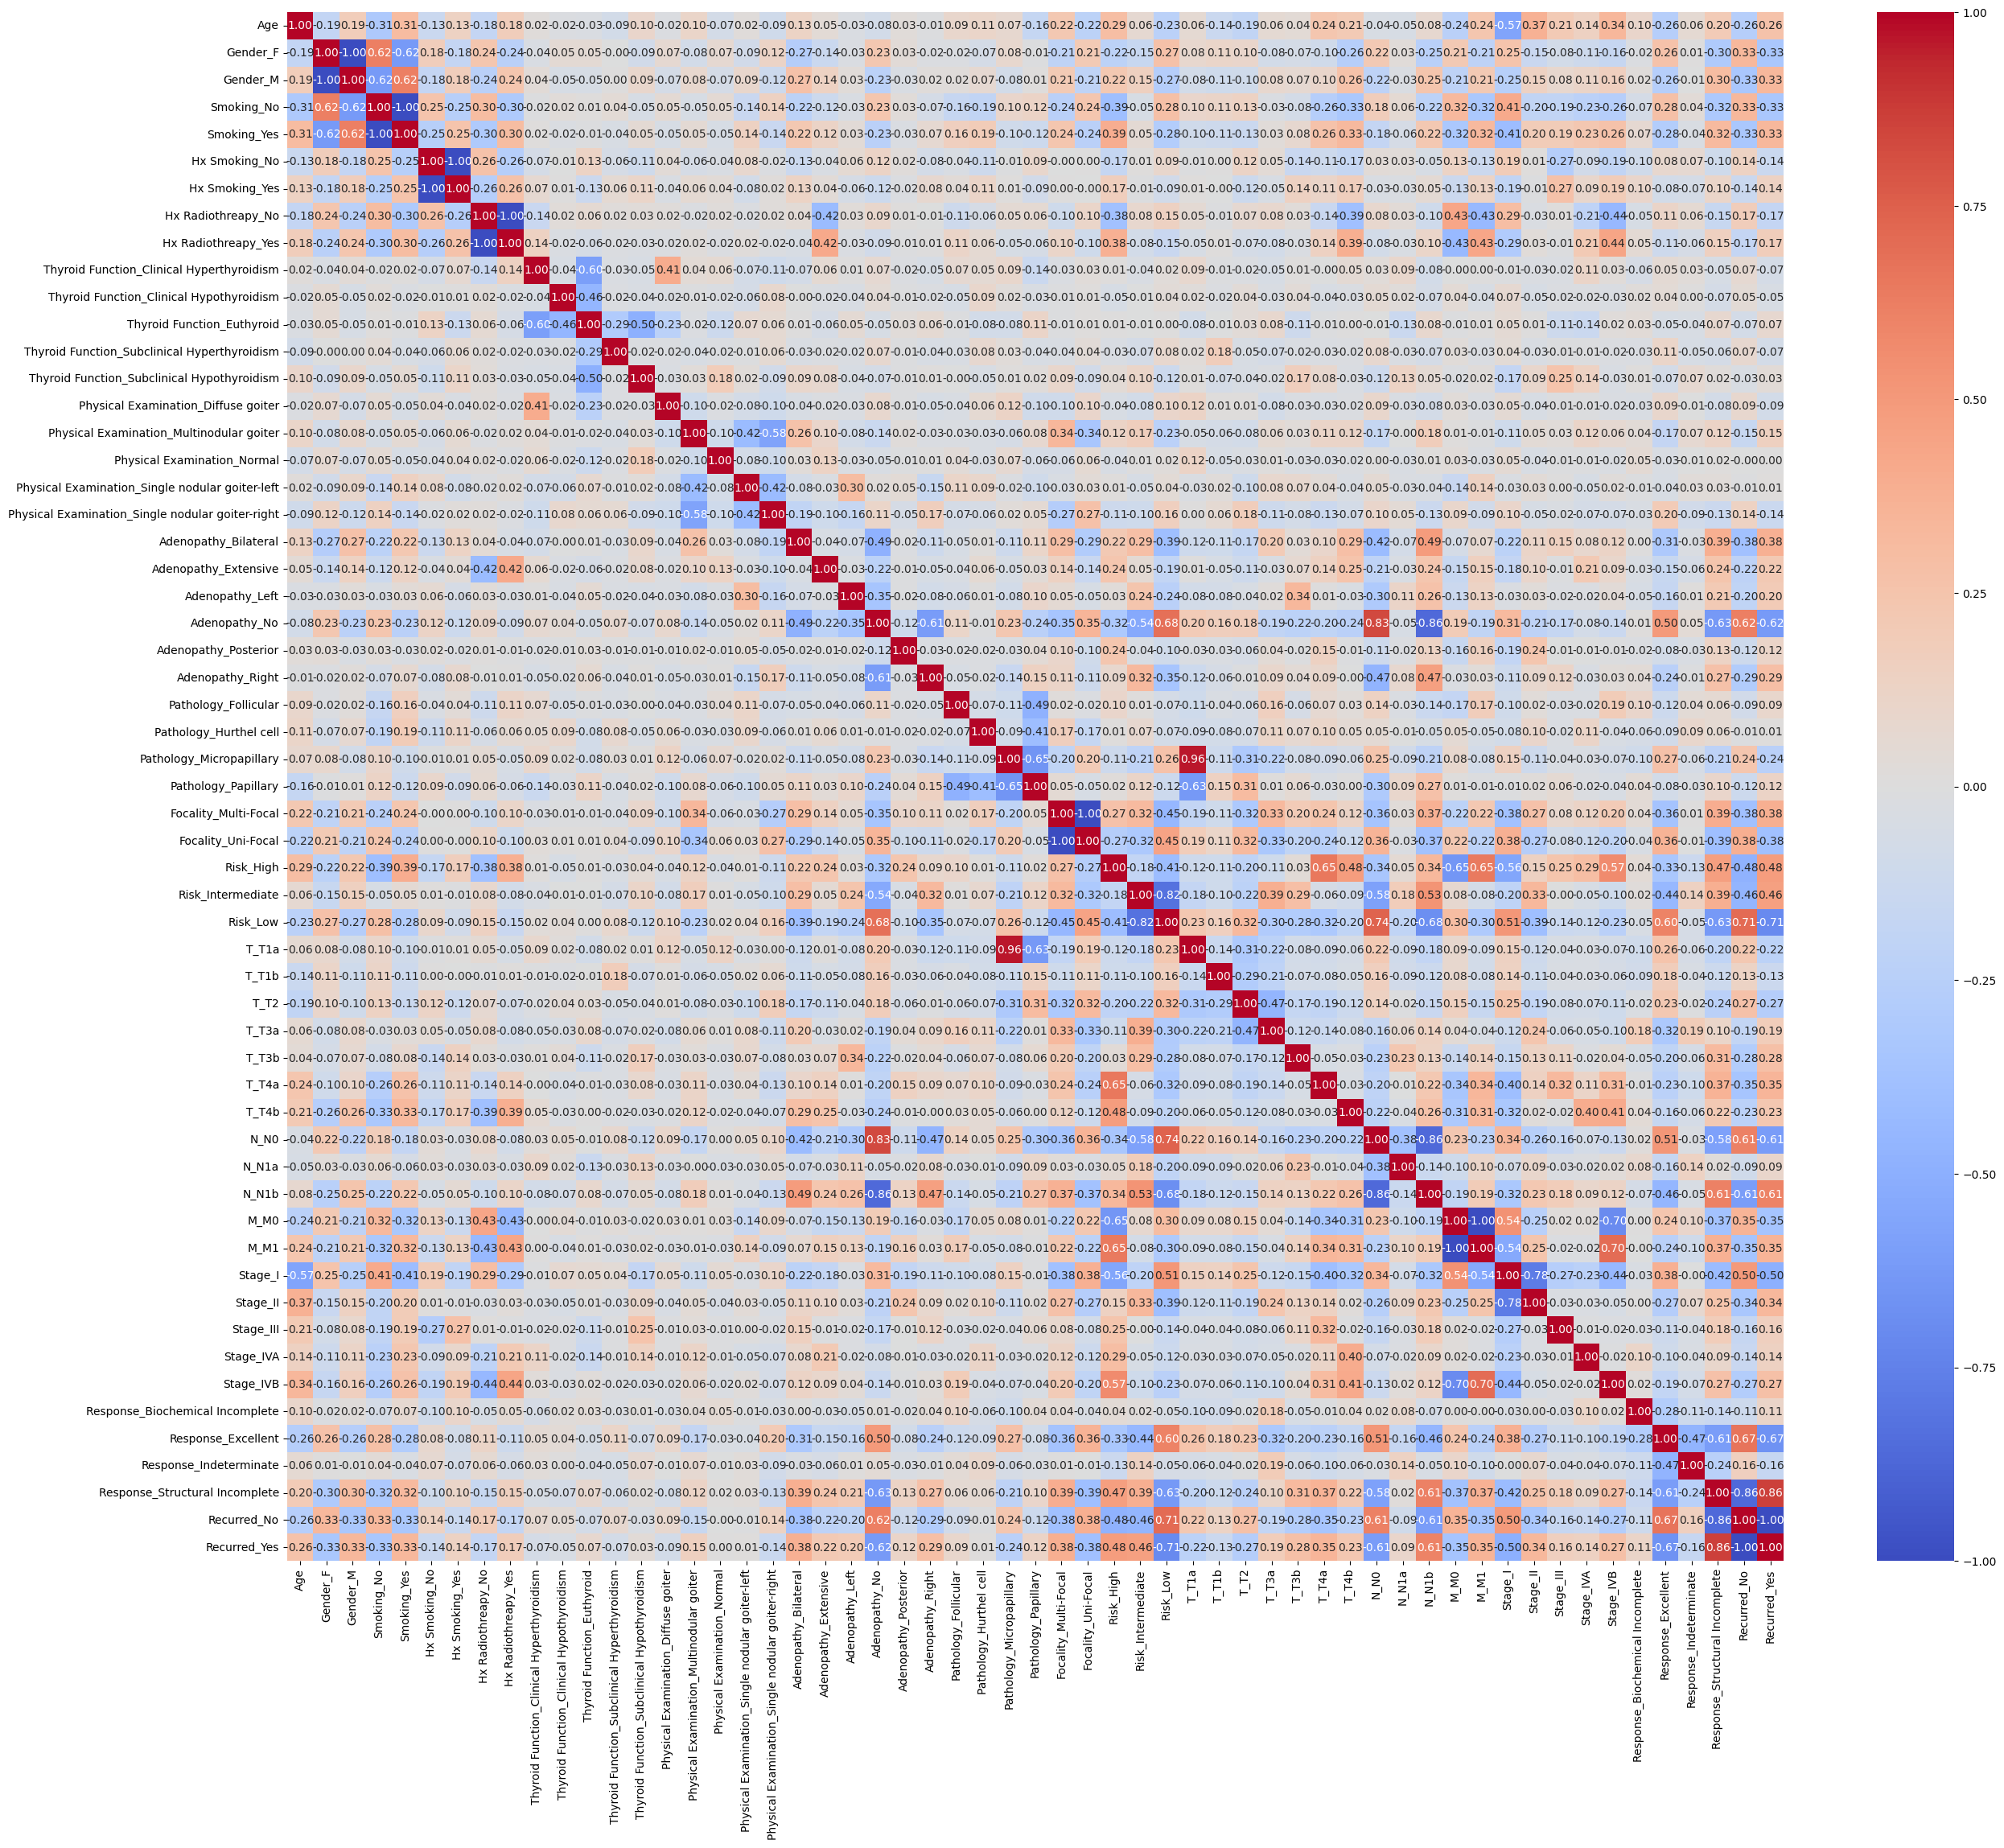

In [ ]:
#ดูความสัมพันธ์ของทุกอัน
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cols = df.select_dtypes(include=['object']).columns
encoded = pd.get_dummies(df, columns=cols)
corr_encoded = encoded.corr()

plt.figure(figsize=(30, 25)) # Increased figure size
sns.heatmap(corr_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

visualizetion

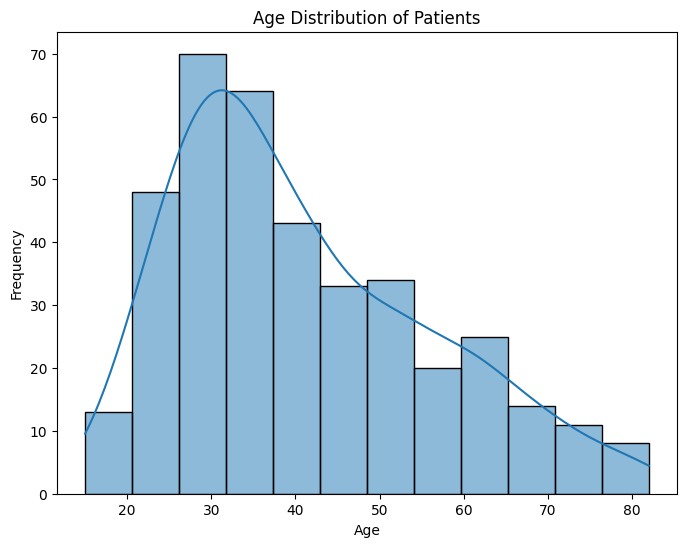

In [ ]:
#การกระจายอายุของผู้ป่วย
plt.figure(figsize=(8, 6))
sns.histplot(x='Age',data=df , kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

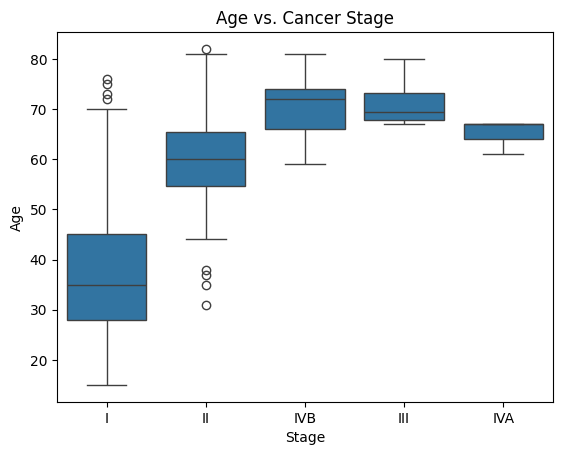

In [ ]:
#ความสัมพันธ์ระหว่างอายุกับระยะการเกิดโรค
sns.boxplot(x='Stage', y='Age', data=df)
plt.title("Age vs. Cancer Stage")
plt.show()

/tmp/ipython-input-3779017887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Risk', y='Age', data=df, palette='OrRd', inner='quartile')


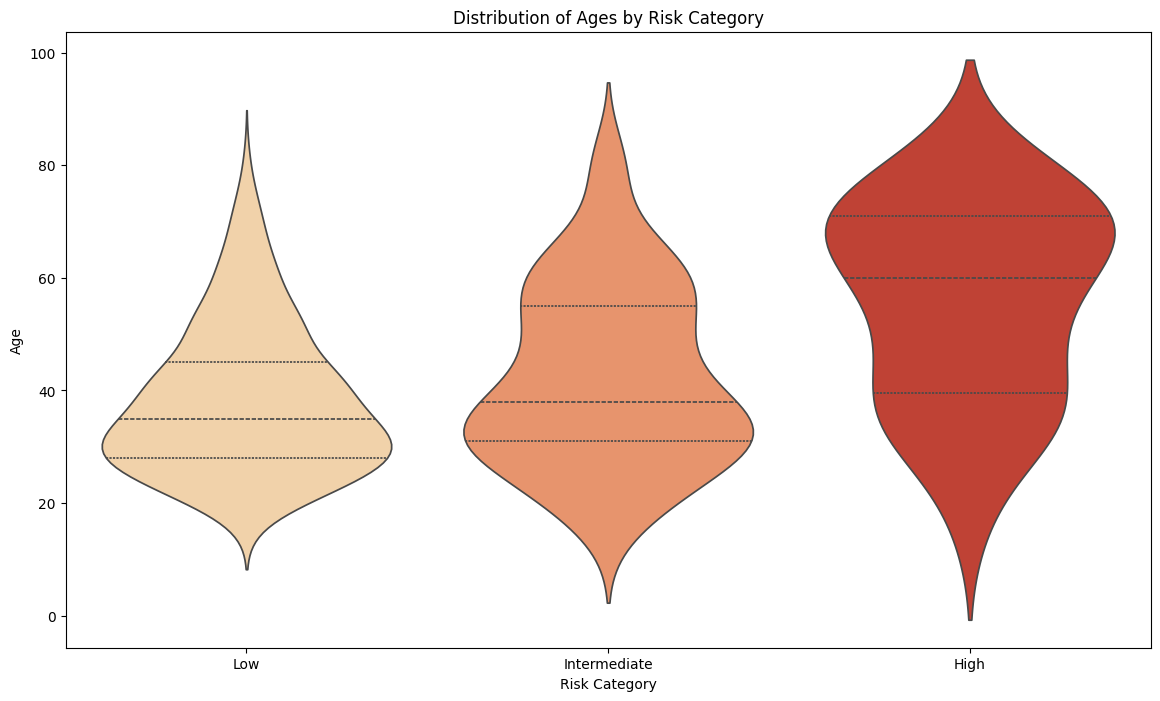

In [ ]:
#การกระจายของอายุ (Age) ตาม ระดับความเสี่ยงของโรค
plt.figure(figsize=(14, 8))
sns.violinplot(x='Risk', y='Age', data=df, palette='OrRd', inner='quartile')
plt.title('Distribution of Ages by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Age')
plt.show()

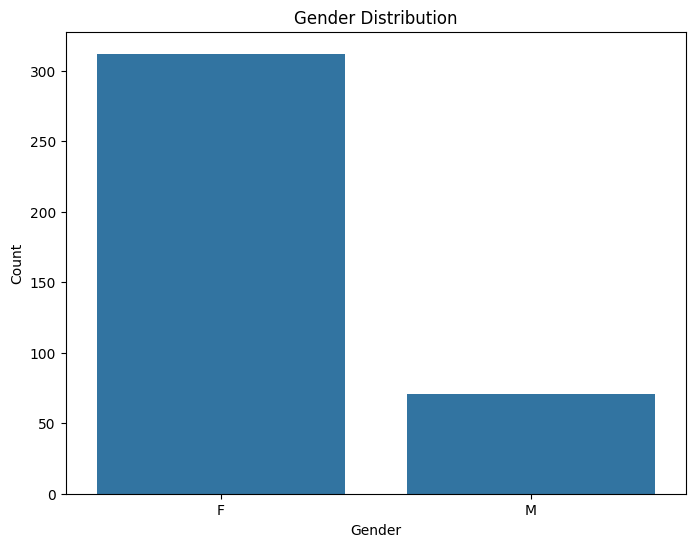

In [ ]:
#จำนวนผู้ป่วยแต่ละเพศ
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

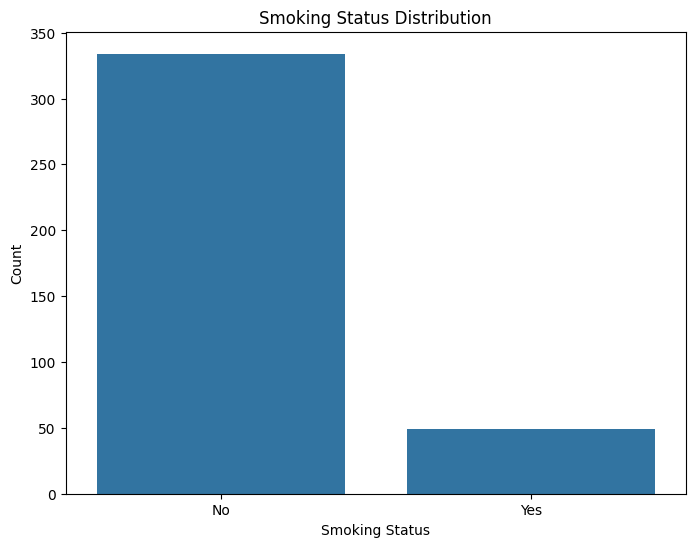

In [ ]:
#การกระจายของ สถานะการสูบบุหรี่
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoking', data=df)
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-3150539664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pathology', data=df, palette='viridis')


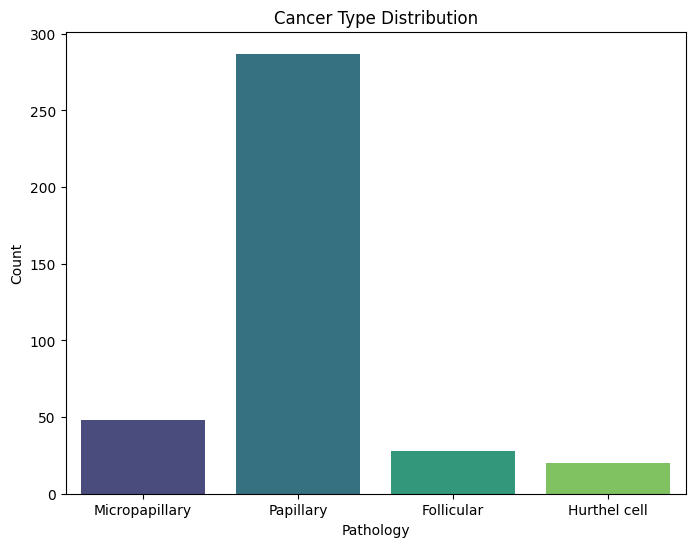

In [ ]:
#การกระจายของชนิดมะเร็ง
plt.figure(figsize=(8, 6))
sns.countplot(x='Pathology', data=df, palette='viridis')
plt.title('Cancer Type Distribution')
plt.xlabel('Pathology')
plt.ylabel('Count')
plt.show()

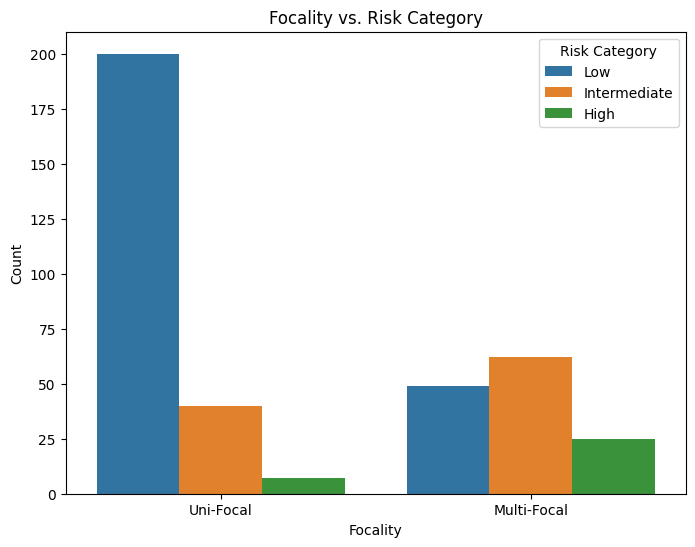

In [ ]:
#ความสัมพันธ์ระหว่างลักษณะก้อนมะเร็งกับระดับความเสี่ยงของโรค
plt.figure(figsize=(8, 6))
sns.countplot(x='Focality', hue='Risk', data=df)
plt.title('Focality vs. Risk Category')
plt.xlabel('Focality')
plt.ylabel('Count')
plt.legend(title='Risk Category')
plt.show()

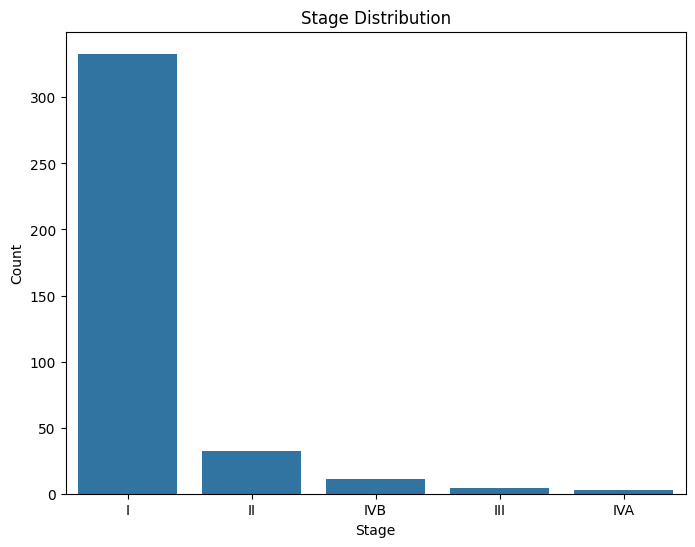

In [ ]:
#ระยะโรคมะเร็ง
plt.figure(figsize=(8, 6))
sns.countplot(x='Stage', data=df)
plt.title('Stage Distribution')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

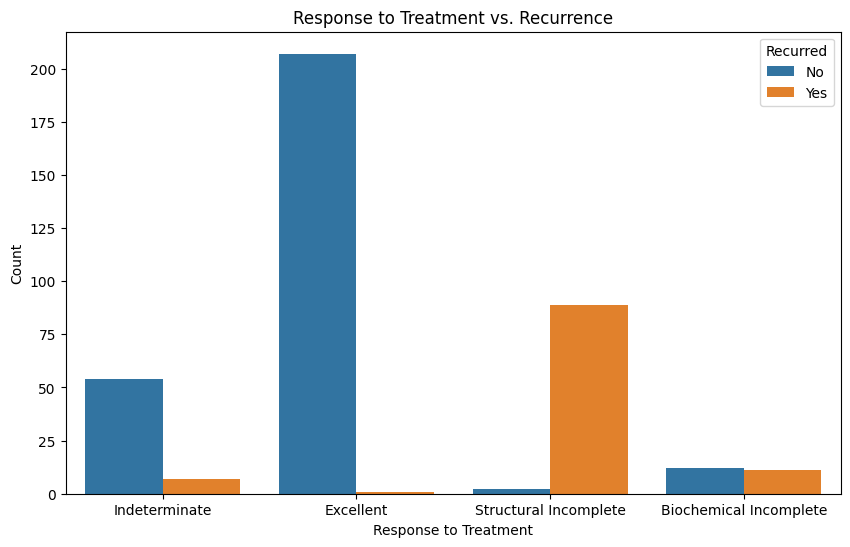

Recurred                       No        Yes
Response                                    
Biochemical Incomplete  52.173913  47.826087
Excellent               99.519231   0.480769
Indeterminate           88.524590  11.475410
Structural Incomplete    2.197802  97.802198


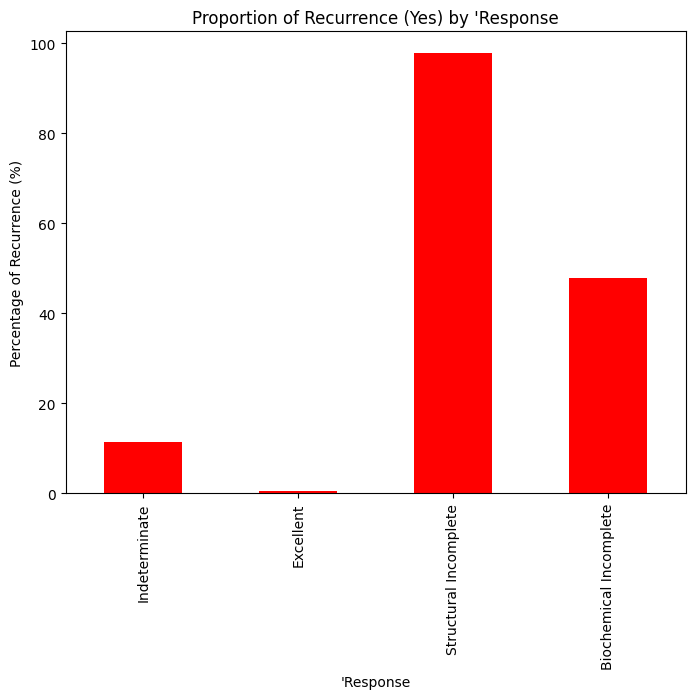

In [ ]:
#ความสัมพันธ์ระหว่างผลการตอบสนองต่อการรักษา กับ การกลับมาเป็นซ้ำของโรค
#ฟาในอดีตสนใจอันนี้
plt.figure(figsize=(10, 6))
sns.countplot(x='Response', hue='Recurred', data=df)
plt.title('Response to Treatment vs. Recurrence')
plt.xlabel('Response to Treatment')
plt.ylabel('Count')
plt.legend(title='Recurred')
plt.show()
prop = pd.crosstab(df['Response'], df['Recurred'], normalize='index') * 100
print(prop)
plt.figure(figsize=(8,6))
prop_yes = prop['Yes']
prop_yes = prop_yes.reindex(df['Response'].unique())
prop_yes.plot(kind='bar', color='red')
plt.title("Proportion of Recurrence (Yes) by 'Response")
plt.ylabel("Percentage of Recurrence (%)")
plt.xlabel("'Response")
plt.show()

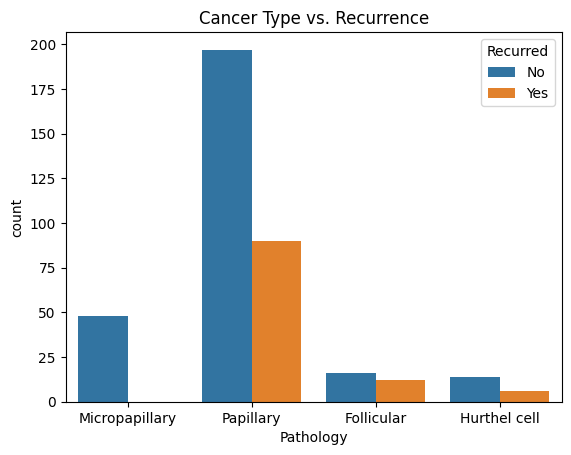

Recurred                No        Yes
Pathology                            
Follicular       57.142857  42.857143
Hurthel cell     70.000000  30.000000
Micropapillary  100.000000   0.000000
Papillary        68.641115  31.358885


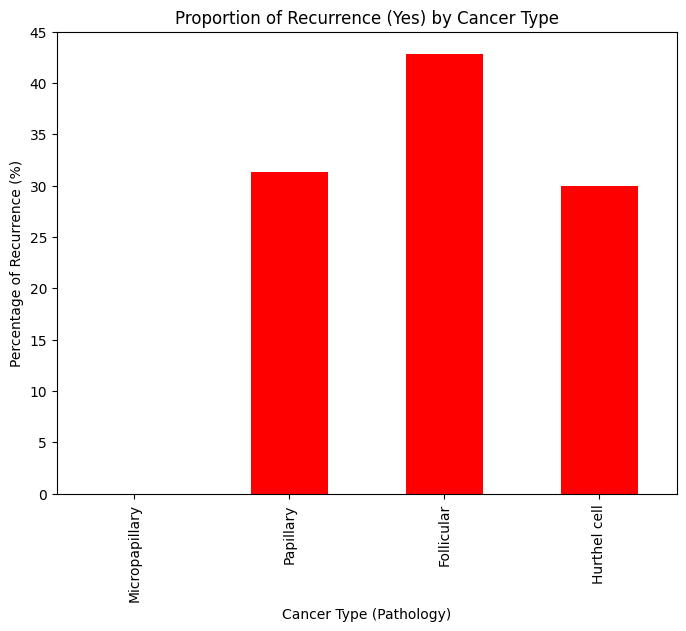

In [ ]:
#สัมพันธ์ของชนิดของมะเร็งกับโอกาสการกลับมาเป็นซ้ำ
#ฟาในอดีตสนใจอันนี้
sns.countplot(x='Pathology', hue='Recurred', data=df)
plt.title("Cancer Type vs. Recurrence")
plt.show()
prop = pd.crosstab(df['Pathology'], df['Recurred'], normalize='index') * 100
print(prop)
plt.figure(figsize=(8,6))
prop_yes = prop['Yes']
prop_yes = prop_yes.reindex(df['Pathology'].unique())
prop_yes.plot(kind='bar', color='red')
plt.title("Proportion of Recurrence (Yes) by Cancer Type")
plt.ylabel("Percentage of Recurrence (%)")
plt.xlabel("Cancer Type (Pathology)")
plt.show()